<a href="https://colab.research.google.com/github/xuyqohzj/Individual-Project/blob/main/IPCC_GWP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 讀取Excel文件 / Reading Excel file
url = 'https://pasteur.epa.gov/uploads/10.23719/1529821/IPCC_AR4-AR6_GWPs.xlsx'
df = pd.read_excel(url, sheet_name="Main")

# 查看工作表名稱 / Checking key names
print(df.keys())

Index(['Indicator', 'GHG', 'GWP kgCO2e/kg GHG'], dtype='object')


In [ ]:
# 查詢資料表資訊 / checkin info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Indicator          1209 non-null   object 
 1   GHG                1209 non-null   object 
 2   GWP kgCO2e/kg GHG  1209 non-null   float64
dtypes: float64(1), object(2)
memory usage: 28.5+ KB
None
  Indicator                                              GHG  \
0   AR4-100                            1,1,1-Trichloroethane   
1   AR4-100              1,1,2,2-Tetrafluoro-1-methoxyethane   
2   AR4-100            1,2-Dibromo-1,1,2,2-tetrafluoroethane   
3   AR4-100  Butane, 1,1,1,2,2,3,3,4,4-nonafluoro-4-methoxy-   
4   AR4-100                                           CFC-11   

   GWP kgCO2e/kg GHG  
0              146.0  
1              359.0  
2             1640.0  
3              297.0  
4             4750.0  


In [ ]:
# (本資料不需要) 檢查缺失值
missing_values = df.isnull().sum()
print(missing_values)

Indicator            0
GHG                  0
GWP kgCO2e/kg GHG    0
dtype: int64


In [ ]:
# 描述性統計
stats = df['GWP kgCO2e/kg GHG'].describe()
print(stats)

count     1209.000000
mean      2680.225676
std       4291.068586
min          0.000000
25%         16.100000
50%        469.000000
75%       3900.000000
max      34100.000000
Name: GWP kgCO2e/kg GHG, dtype: float64


In [ ]:
#將 Indicator 欄位拆分為 Report {AR4,AR5,AR6} 以及 Time Horizon {20,100,500} 這兩個欄位。

df[['Report', 'Time Horizon']] = df['Indicator'].str.extract(r'(AR\d+)-(\d+)')

發現資料中最大的GWP是AR6-500的六氟化硫(Sulfur hexafluoride)，好奇該氣體在不同報告，不同評估的週期變化。

In [ ]:
import matplotlib.pyplot as plt
interest_data = df[df["GHG"] == "Sulfur hexafluoride"]
print(interest_data)

     Indicator                  GHG  GWP kgCO2e/kg GHG Report Time Horizon
60     AR4-100  Sulfur hexafluoride            22800.0    AR4          100
122     AR4-20  Sulfur hexafluoride            16300.0    AR4           20
184    AR4-500  Sulfur hexafluoride            32600.0    AR4          500
377    AR5-100  Sulfur hexafluoride            23500.0    AR5          100
578     AR5-20  Sulfur hexafluoride            17500.0    AR5           20
785    AR6-100  Sulfur hexafluoride            25200.0    AR6          100
992     AR6-20  Sulfur hexafluoride            18300.0    AR6           20
1199   AR6-500  Sulfur hexafluoride            34100.0    AR6          500


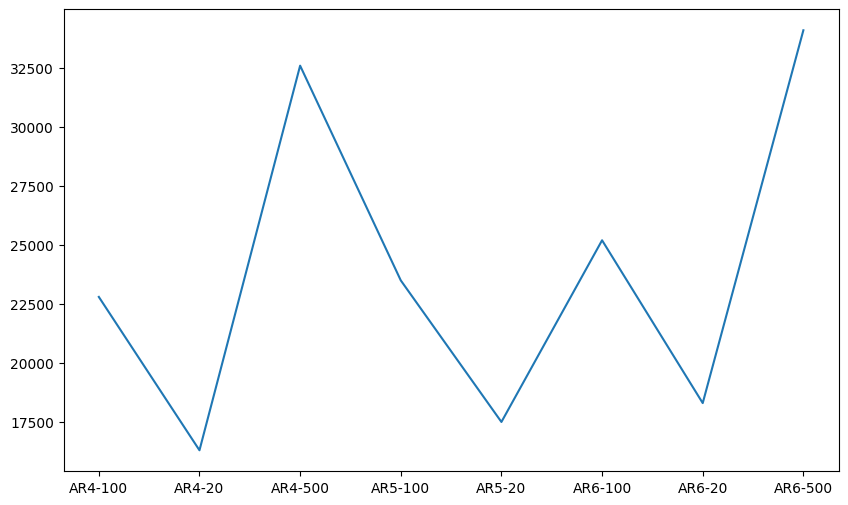

In [ ]:
gwp = interest_data['GWP kgCO2e/kg GHG']
ind = interest_data['Indicator']
plt.figure(figsize=(10,6))
plt.plot(ind, gwp)

我們發現這份資料表中，GWP最大的氣體是"Sulfur hexafluoride"(六氟化硫)，所以我們想知道該氣體在不同報告與不同週期的GWP變化。

In [ ]:
time_ind = ['AR4-20', 'AR4-100', 'AR4-500',
       'AR5-20', 'AR5-100', 'AR5-500',
       'AR6-20', 'AR6-100', 'AR6-500']

gwp = []
label = []
for ind in time_ind:
  target = interest_data[interest_data['Indicator'].str.contains(ind)]
  if not target.empty:
    gwp.append(target['GWP kgCO2e/kg GHG'].values[0])
    label.append(ind)

print(gwp)
print(label)

[np.float64(16300.0), np.float64(22800.0), np.float64(32600.0), np.float64(17500.0), np.float64(23500.0), np.float64(18300.0), np.float64(25200.0), np.float64(34100.0)]
['AR4-20', 'AR4-100', 'AR4-500', 'AR5-20', 'AR5-100', 'AR6-20', 'AR6-100', 'AR6-500']


畫出六氟化硫在不同報告、不同評估週期的GWP

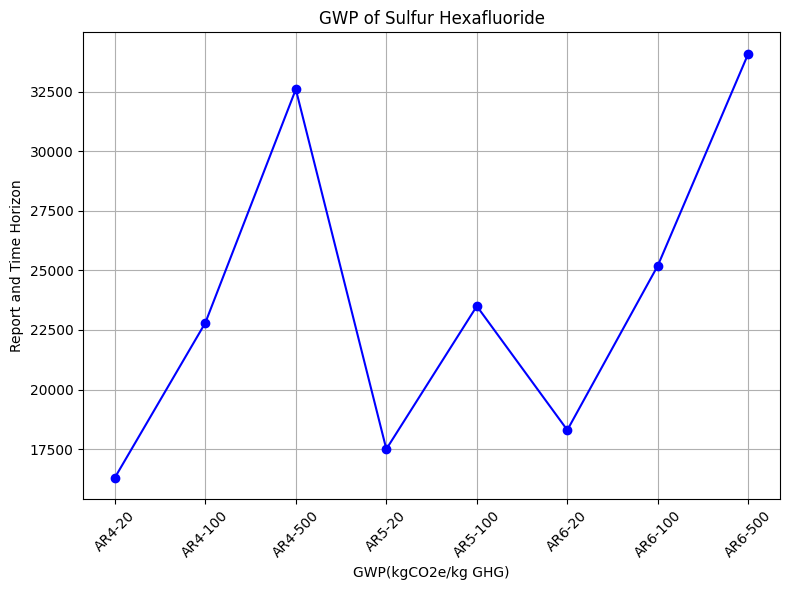

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(label, gwp, marker='o', color='blue')
plt.title('GWP of Sulfur Hexafluoride')
plt.xlabel('GWP(kgCO2e/kg GHG)')
plt.ylabel('Report and Time Horizon')
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()

改用 seaborn 畫圖

In [ ]:
print(df)

     Indicator                                              GHG  \
0      AR4-100                            1,1,1-Trichloroethane   
1      AR4-100              1,1,2,2-Tetrafluoro-1-methoxyethane   
2      AR4-100            1,2-Dibromo-1,1,2,2-tetrafluoroethane   
3      AR4-100  Butane, 1,1,1,2,2,3,3,4,4-nonafluoro-4-methoxy-   
4      AR4-100                                           CFC-11   
...        ...                                              ...   
1204   AR6-500                                Trichloroethylene   
1205   AR6-500              Trifluoro(trifluoromethoxy)ethylene   
1206   AR6-500             Trifluoromethyl sulfur pentafluoride   
1207   AR6-500                                   Vinyl fluoride   
1208   AR6-500                              Vinylidene fluoride   

      GWP kgCO2e/kg GHG Report Time Horizon  
0               146.000    AR4          100  
1               359.000    AR4          100  
2              1640.000    AR4          100  
3          

[{'Indicator': 'AR4-20', 'GWP': np.float64(16300.0)}, {'Indicator': 'AR4-100', 'GWP': np.float64(22800.0)}, {'Indicator': 'AR4-500', 'GWP': np.float64(32600.0)}, {'Indicator': 'AR5-20', 'GWP': np.float64(17500.0)}, {'Indicator': 'AR5-100', 'GWP': np.float64(23500.0)}, {'Indicator': 'AR6-20', 'GWP': np.float64(18300.0)}, {'Indicator': 'AR6-100', 'GWP': np.float64(25200.0)}, {'Indicator': 'AR6-500', 'GWP': np.float64(34100.0)}]


<Axes: xlabel='Indicator', ylabel='GWP'>

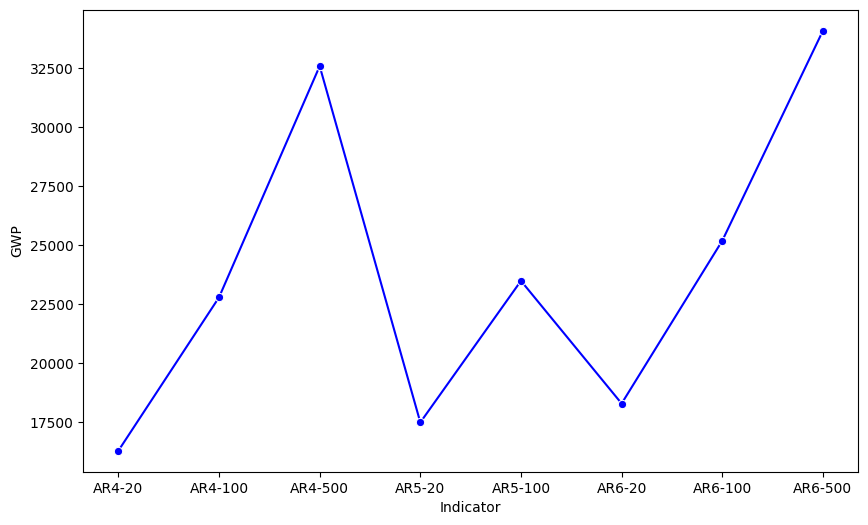

In [ ]:
import seaborn as sns

# 從完整資料篩選出六氟化硫
gwp_data = []
gas = 'Sulfur hexafluoride'
for ind in time_ind:
  target = df[df['Indicator'].str.contains(ind) & df['GHG'].str.contains(gas)]
  if not target.empty:
    gwp_data.append({'Indicator': ind, 'GWP': target['GWP kgCO2e/kg GHG'].values[0]})

print(gwp_data)

# 建立 dataframe
gwp_df = pd.DataFrame(gwp_data)

# 畫圖
plt.figure(figsize=(10,6))
sns.lineplot(data=gwp_df, x='Indicator', y='GWP', marker='o', color='blue')

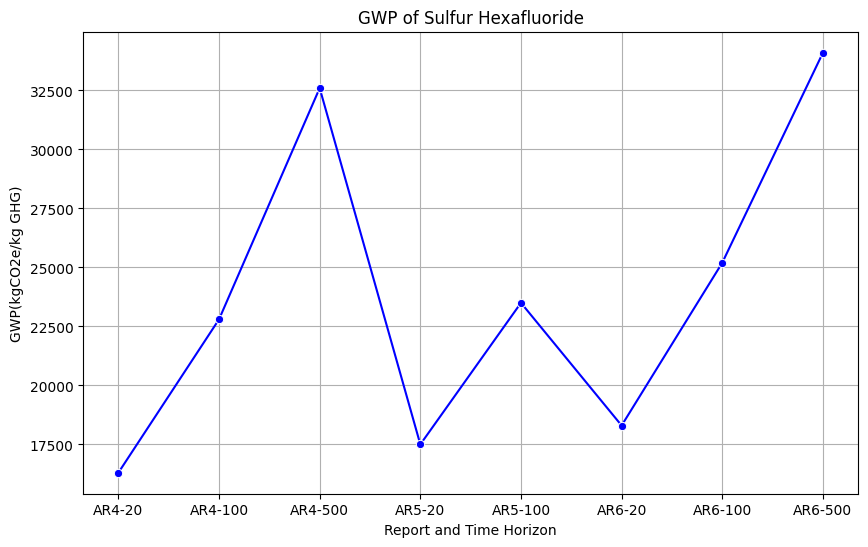

In [ ]:
import seaborn as sns
# 建立 dataframe
gwp_df = pd.DataFrame(gwp_data)

# 畫圖
plt.figure(figsize=(10,6))
sns.lineplot(data=gwp_df, x='Indicator', y='GWP', marker='o', color='blue')
plt.title('GWP of Sulfur Hexafluoride')
plt.ylabel('GWP(kgCO2e/kg GHG)')
plt.xlabel('Report and Time Horizon')
plt.grid()

In [ ]:
# 重新命名長欄位
df.rename(columns = {"GWP kgCO2e/kg GHG":"GWP"}, inplace = True)

##注意到 AR5-500 沒有值，將程式改為沒有值的GWP設為0。

/tmp/ipython-input-14-1325285745.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gwp_df, x='Indicator', y='GWP', palette=economist_palette)
/tmp/ipython-input-14-1325285745.py:14: UserWarning: 
The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=gwp_df, x='Indicator', y='GWP', palette=economist_palette)


Text(0.5, 1.0, 'GWP of Sulfur Hexafluoride')

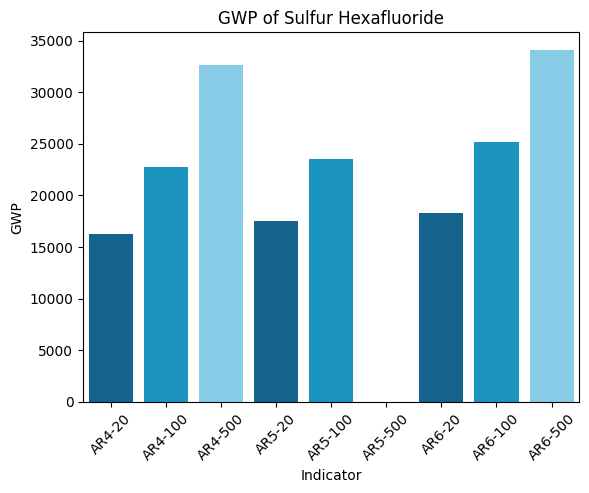

In [ ]:
gwp_data = []
gas = 'Sulfur hexafluoride' # 六氟化硫
for ind in time_ind:
  target = df[df['Indicator'].str.contains(ind) & df['GHG'].str.contains(gas)]
  if not target.empty:
    gwp_data.append({'Indicator': ind, 'GWP': target['GWP'].values[0]})
  else:
    gwp_data.append({'Indicator':ind, 'GWP': 0})
# 建立 dataframe
gwp_df = pd.DataFrame(gwp_data)
# 經濟學人色板
economist_palette = ["#006BA2", "#01a2d9", "#7ad2f6"]
# 重新畫 barplot
sns.barplot(data=gwp_df, x='Indicator', y='GWP', palette=economist_palette)
plt.xticks(rotation=45)
plt.title('GWP of Sulfur Hexafluoride')

In [ ]:
print(gwp_df)
#sns.lineplot(data=gwp_df, x = "Indicator", y = "GWP", marker = "o", color = "blue")

  Indicator      GWP
0    AR4-20  16300.0
1   AR4-100  22800.0
2   AR4-500  32600.0
3    AR5-20  17500.0
4   AR5-100  23500.0
5   AR5-500      0.0
6    AR6-20  18300.0
7   AR6-100  25200.0
8   AR6-500  34100.0


##顯示 AR6-20 GWP 最高的前10名

In [ ]:
# 篩選前10名氣體：
df_ar6_20 = df[df["Indicator"] == "AR6-20"]
top10_20 = df_ar6_20.sort_values(by = "GWP", ascending = False).head(10)
print(top10_20)

    Indicator                                     GHG      GWP Report  \
992    AR6-20                     Sulfur hexafluoride  18300.0    AR6   
999    AR6-20    Trifluoromethyl sulfur pentafluoride  13900.0    AR6   
953    AR6-20    Methane, (difluoromethoxy)trifluoro-  13500.0    AR6   
960    AR6-20                    Nitrogen trifluoride  13400.0    AR6   
851    AR6-20                                  CFC-12  12700.0    AR6   
955    AR6-20               Methane, oxybis[difluoro-  12700.0    AR6   
852    AR6-20                                  CFC-13  12400.0    AR6   
906    AR6-20                                  HFC-23  12400.0    AR6   
954    AR6-20  Methane, bis(difluoromethoxy)difluoro-  11700.0    AR6   
941    AR6-20                                   HG-02  11000.0    AR6   

    Time Horizon  
992           20  
999           20  
953           20  
960           20  
851           20  
955           20  
852           20  
906           20  
954           20  
941   

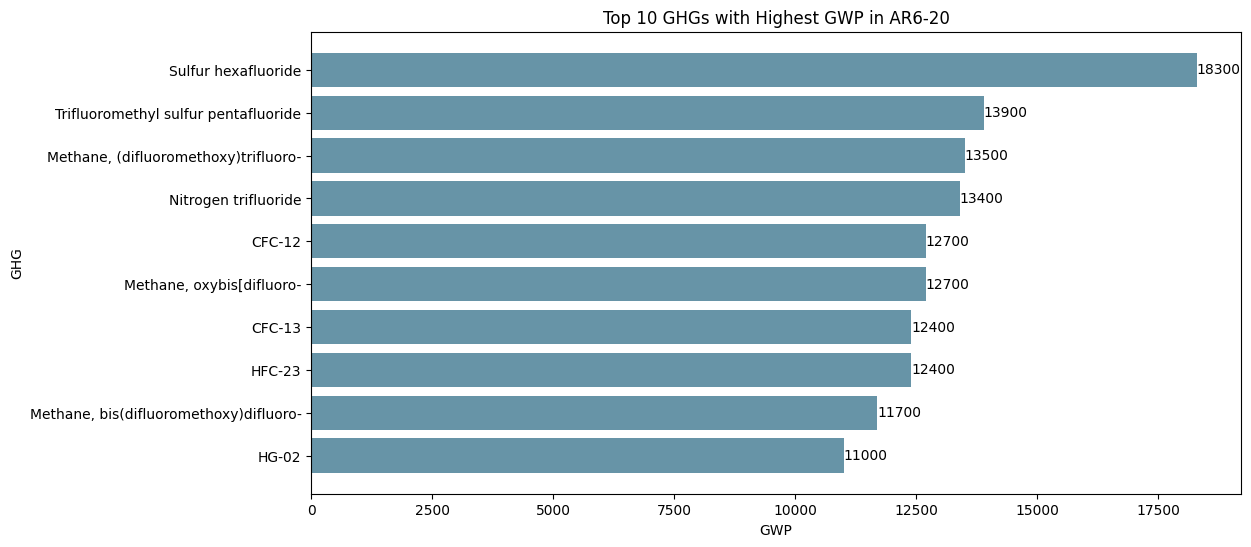

In [ ]:
# 繪製水平程條圖
plt.figure(figsize=(12, 6))
plt.barh(top10_20["GHG"], top10_20["GWP"], color="#6794a7")
# 由大到小顯示
plt.gca().invert_yaxis()
# 標籤
plt.xlabel("GWP")
plt.ylabel("GHG")
plt.title("Top 10 GHGs with Highest GWP in AR6-20")

# 格線
#plt.grid(linestyle = "-.", linewidth = 0.7, axis = "x")

# 顯示數據標籤
for index, value in enumerate(top10_20["GWP"]):
    #plt.text(value, index, str(round(value, 2)), ha="left", va="center")
    plt.text(value, index,f"{value:.0f}", va = "center")
# 顯示圖表
plt.show()

Text(0.5, 0, 'GWP')

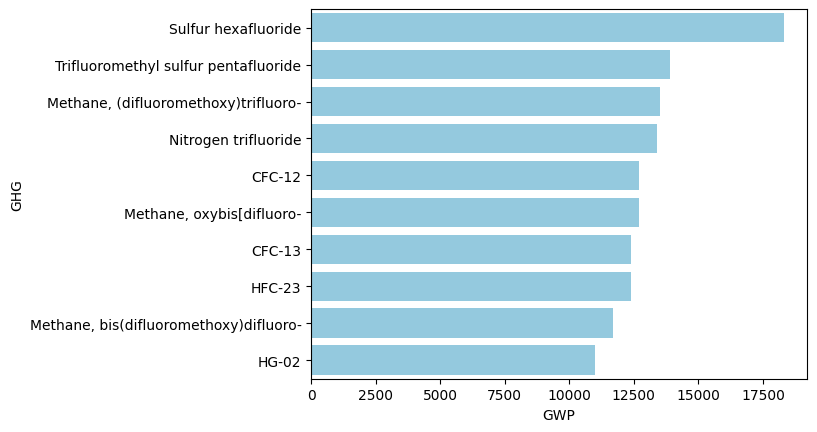

In [ ]:
# 改用 seaborn
top10_20_df = pd.DataFrame(top10_20)
sns.barplot(data = top10_20_df, x = "GWP", y = "GHG", color = "Skyblue", orient = "h")
#plt.title("Top 10 GHGs with Highest GWP in AR6-20")
plt.xlabel("GWP")

##顯示 AR6-100 GWP 的前10名

In [ ]:
# 篩選AR6 100 的前10名氣體：
df_ar6_100 = df[df["Indicator"] == "AR6-100"]
top10_100 = df_ar6_100.sort_values(by = "GWP", ascending = False).head(10)
print(top10_100)

    Indicator                                   GHG      GWP Report  \
785   AR6-100                   Sulfur hexafluoride  25200.0    AR6   
792   AR6-100  Trifluoromethyl sulfur pentafluoride  18500.0    AR6   
753   AR6-100                  Nitrogen trifluoride  17400.0    AR6   
645   AR6-100                                CFC-13  16200.0    AR6   
699   AR6-100                                HFC-23  14600.0    AR6   
746   AR6-100  Methane, (difluoromethoxy)trifluoro-  14300.0    AR6   
644   AR6-100                                CFC-12  12500.0    AR6   
742   AR6-100                      Hexafluoroethane  12400.0    AR6   
761   AR6-100                  Perfluorocyclobutane  10200.0    AR6   
760   AR6-100                       Perfluorobutane  10000.0    AR6   

    Time Horizon  
785          100  
792          100  
753          100  
645          100  
699          100  
746          100  
644          100  
742          100  
761          100  
760          100  


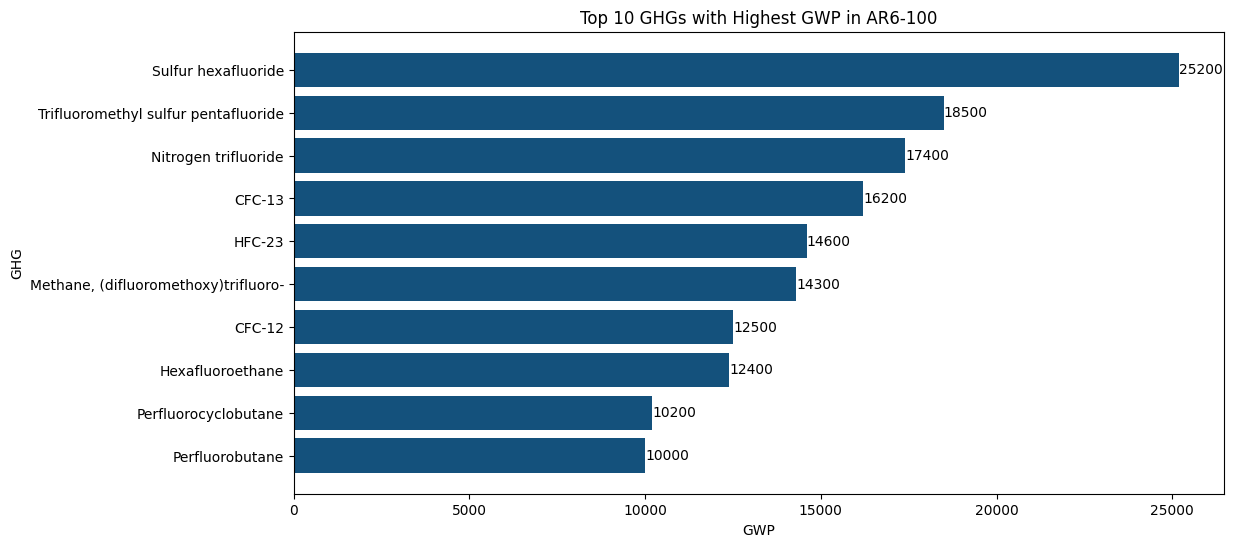

In [ ]:
# 繪製水平程條圖
plt.figure(figsize=(12, 6))
plt.barh(top10_100["GHG"], top10_100["GWP"], color="#14517C")
# 由大到小顯示
plt.gca().invert_yaxis()
# 標籤
plt.xlabel("GWP")
plt.ylabel("GHG")
plt.title("Top 10 GHGs with Highest GWP in AR6-100")

# 格線
#plt.grid(linestyle = "-.", linewidth = 0.7, axis = "x")

# 顯示數據標籤
for index, value in enumerate(top10_100["GWP"]):
    #plt.text(value, index, str(round(value, 2)), ha="left", va="center")
    plt.text(value, index,f"{value:.0f}", va = "center")
# 顯示圖表
plt.show()

Text(0.5, 0, 'GWP')

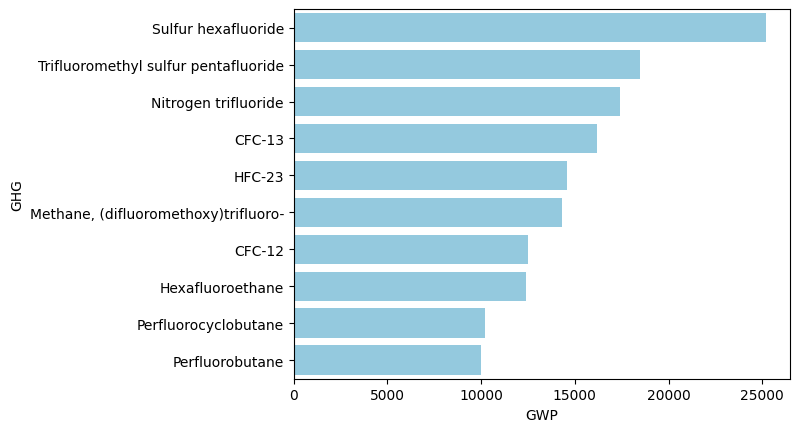

In [ ]:
# 改用 seaborn
top10_100_df = pd.DataFrame(top10_100)
sns.barplot(data = top10_100_df, x = "GWP", y = "GHG", color = "Skyblue", orient = "h")
#plt.title("Top 10 GHGs with Highest GWP in AR6-100")
plt.xlabel("GWP")

##顯示 AR6-500 GWP 的前10名

In [ ]:
# 篩選AR6 500 的前10名氣體：
df_ar6_500 = df[df["Indicator"] == "AR6-500"]
top10_500 = df_ar6_500.sort_values(by = "GWP", ascending = False).head(10)
print(top10_500)

     Indicator                                   GHG      GWP Report  \
1199   AR6-500                   Sulfur hexafluoride  34100.0    AR6   
1206   AR6-500  Trifluoromethyl sulfur pentafluoride  21100.0    AR6   
1167   AR6-500                  Nitrogen trifluoride  18200.0    AR6   
1156   AR6-500                      Hexafluoroethane  17500.0    AR6   
1059   AR6-500                                CFC-13  17500.0    AR6   
1175   AR6-500                  Perfluorocyclobutane  13800.0    AR6   
1174   AR6-500                       Perfluorobutane  13400.0    AR6   
1189   AR6-500                      Perfluoropentane  12700.0    AR6   
1190   AR6-500                      Perfluoropropane  12400.0    AR6   
1187   AR6-500                       Perfluorohexane  11600.0    AR6   

     Time Horizon  
1199          500  
1206          500  
1167          500  
1156          500  
1059          500  
1175          500  
1174          500  
1189          500  
1190          500  
1187   

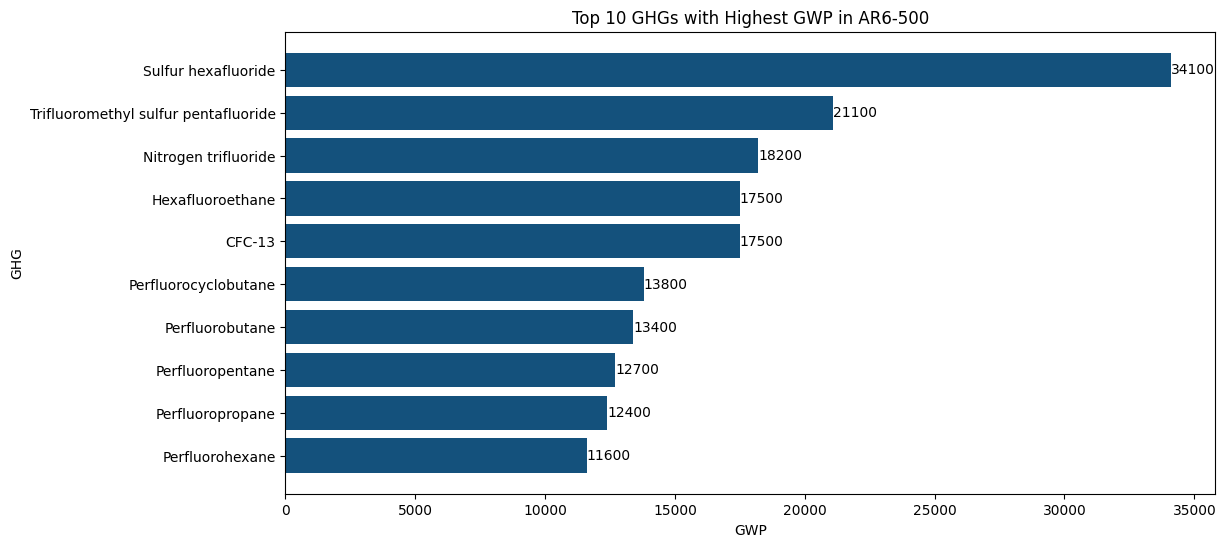

In [ ]:
# 繪製水平程條圖
plt.figure(figsize=(12, 6))
plt.barh(top10_500["GHG"], top10_500["GWP"], color="#14517C")
# 由大到小顯示
plt.gca().invert_yaxis()
# 標籤
plt.xlabel("GWP")
plt.ylabel("GHG")
plt.title("Top 10 GHGs with Highest GWP in AR6-500")

# 格線
#plt.grid(linestyle = "-.", linewidth = 0.7, axis = "x")

# 顯示數據標籤
for index, value in enumerate(top10_500["GWP"]):
    #plt.text(value, index, str(round(value, 2)), ha="left", va="center")
    plt.text(value, index,f"{value:.0f}", va = "center")
# 顯示圖表
plt.show()

改用 seaborn 畫圖

Text(0.5, 0, 'GWP')

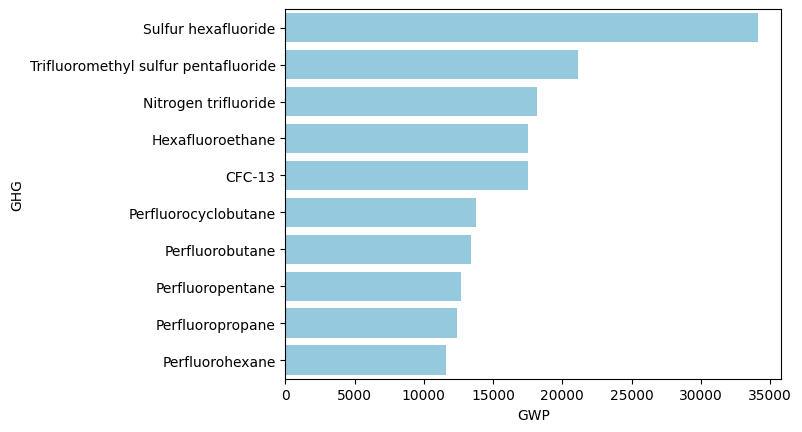

In [ ]:
top10_500_df = pd.DataFrame(top10_500)
sns.barplot(data = top10_500_df, x = "GWP", y = "GHG", color = "Skyblue", orient = "h")
#plt.title("Top 10 GHGs with Highest GWP in AR6-500")
plt.xlabel("GWP")

分析 Methane, oxybis[difluoro- / 二氟-雙(二氟甲氧基)甲烷在不同報告與不同週期的長條圖

     Indicator                        GHG      GWP Report Time Horizon
47     AR4-100  Methane, oxybis[difluoro-   6320.0    AR4          100
109     AR4-20  Methane, oxybis[difluoro-  12200.0    AR4           20
171    AR4-500  Methane, oxybis[difluoro-   1960.0    AR4          500
345    AR5-100  Methane, oxybis[difluoro-   5560.0    AR5          100
546     AR5-20  Methane, oxybis[difluoro-  11600.0    AR5           20
748    AR6-100  Methane, oxybis[difluoro-   6630.0    AR6          100
955     AR6-20  Methane, oxybis[difluoro-  12700.0    AR6           20
1162   AR6-500  Methane, oxybis[difluoro-   1940.0    AR6          500
Empty DataFrame
Columns: [Indicator, GHG, GWP, Report, Time Horizon]
Index: []


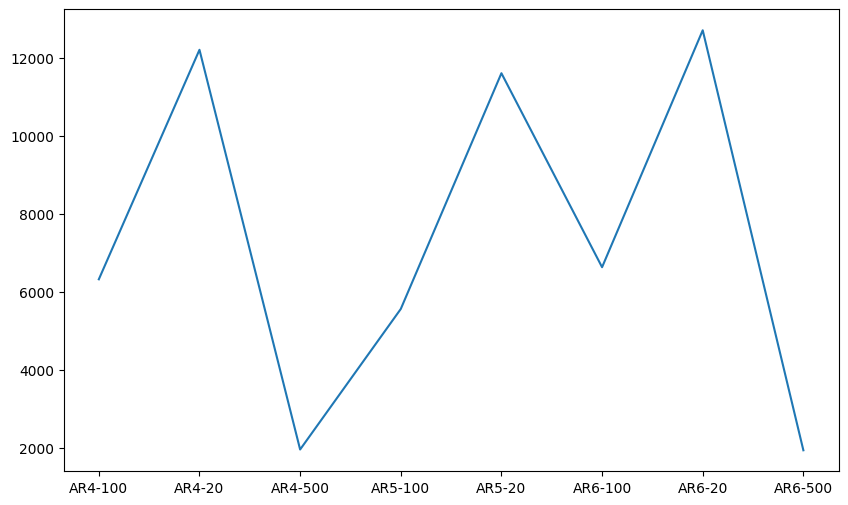

In [ ]:
import matplotlib.pyplot as plt
data1 = df[df["GHG"] == "Methane, oxybis[difluoro-"]
data2 = df[df["GHG"] == "sulfur hexafluoride"]
print(data1)
# print(data2)
# %%
# Access the column using the new name 'GWP'
gwp1 = data1['GWP']
ind1 = data1['Indicator']
plt.figure(figsize=(10,6))
plt.plot(ind1, gwp1)
# plt.plot()

In [ ]:
# searching in the list of for global warming potentials in assessment reports in in different time zones.
time_ind = ['AR4-20', 'AR4-100', 'AR4-500',
       'AR5-20', 'AR5-100', 'AR5-500',
       'AR6-20', 'AR6-100', 'AR6-500']

gwp = []
label = []
for ind in time_ind:
  target = data1[data1['Indicator'].str.contains(ind)]
  if not target.empty:
    gwp.append(target['GWP'].values[0])
    label.append(ind)

print(gwp)
print(label)

[np.float64(12200.0), np.float64(6320.0), np.float64(1960.0), np.float64(11600.0), np.float64(5560.0), np.float64(12700.0), np.float64(6630.0), np.float64(1940.0)]
['AR4-20', 'AR4-100', 'AR4-500', 'AR5-20', 'AR5-100', 'AR6-20', 'AR6-100', 'AR6-500']


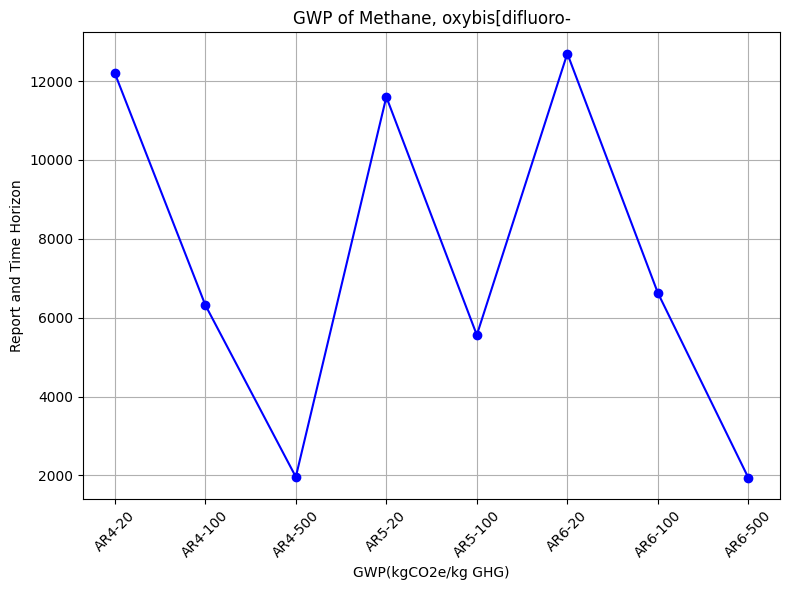

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(label, gwp, marker='o', color='blue')
plt.title('GWP of Methane, oxybis[difluoro-')
plt.xlabel('GWP(kgCO2e/kg GHG)')
plt.ylabel('Report and Time Horizon')
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
print(df)

     Indicator                                              GHG        GWP  \
0      AR4-100                            1,1,1-Trichloroethane    146.000   
1      AR4-100              1,1,2,2-Tetrafluoro-1-methoxyethane    359.000   
2      AR4-100            1,2-Dibromo-1,1,2,2-tetrafluoroethane   1640.000   
3      AR4-100  Butane, 1,1,1,2,2,3,3,4,4-nonafluoro-4-methoxy-    297.000   
4      AR4-100                                           CFC-11   4750.000   
...        ...                                              ...        ...   
1204   AR6-500                                Trichloroethylene      0.013   
1205   AR6-500              Trifluoro(trifluoromethoxy)ethylene      0.003   
1206   AR6-500             Trifluoromethyl sulfur pentafluoride  21100.000   
1207   AR6-500                                   Vinyl fluoride      0.007   
1208   AR6-500                              Vinylidene fluoride      0.015   

     Report Time Horizon  
0       AR4          100  
1       A

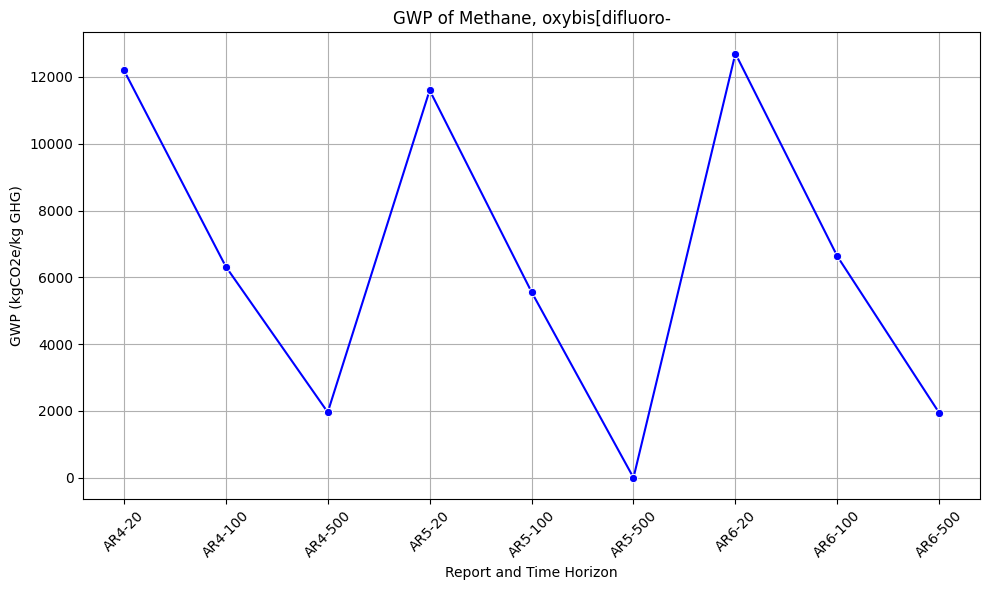

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' and 'time_ind' are already defined as in the original code

# Filter data for Methane, oxybis[difluoro-
gwp_data = []
gas = 'Methane, oxybis[difluoro-'
for ind in time_ind:
    target = df[(df['Indicator'] == ind) & (df['GHG'] == gas)] # used == for exact match of Indicator and GHG value
    if not target.empty:
        gwp_data.append({'Indicator': ind, 'GWP': target['GWP'].values[0]})  # Use 'GWP' column
    else:
        gwp_data.append({'Indicator':ind, 'GWP': 0})


# Create DataFrame
gwp_df = pd.DataFrame(gwp_data)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=gwp_df, x='Indicator', y='GWP', marker='o', color='blue')
plt.title('GWP of Methane, oxybis[difluoro-')
plt.xlabel('Report and Time Horizon')
plt.ylabel('GWP (kgCO2e/kg GHG)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.tight_layout()
plt.show()

畫出長條圖

/tmp/ipython-input-37-566753896.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gwp_df, x='Indicator', y='GWP', palette=economist_palette)
/tmp/ipython-input-37-566753896.py:15: UserWarning: 
The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=gwp_df, x='Indicator', y='GWP', palette=economist_palette)


Text(0.5, 1.0, 'GWP of Methane, oxybis[difluoro-')

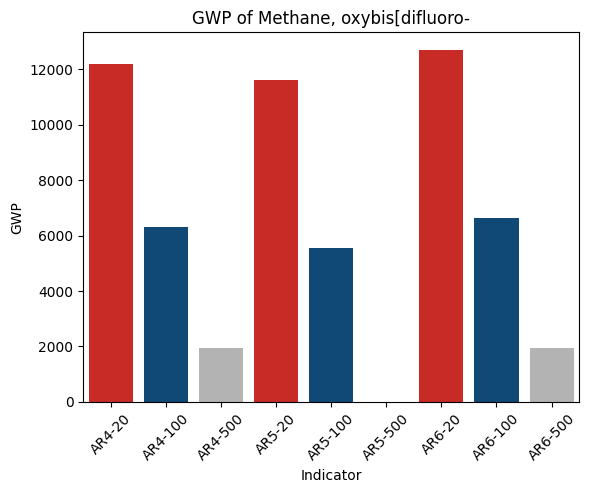

In [ ]:
gwp_data = []
gas = 'Methane, oxybis[difluoro-' # 二氟-雙(二氟甲氧基)甲烷
for ind in time_ind:
  target = df[(df['Indicator'] == ind) & (df['GHG'] == gas)]
  if not target.empty:
    gwp_data.append({'Indicator': ind, 'GWP': target['GWP'].values[0]})
  else:
    gwp_data.append({'Indicator':ind, 'GWP': 0})

# 建立 dataframe
gwp_df = pd.DataFrame(gwp_data)
# 經濟學人色板
economist_palette = ["#E3120B", "#004B87", "#B3B3B3"]
# 重新畫 barplot
sns.barplot(data=gwp_df, x='Indicator', y='GWP', palette=economist_palette)
plt.xticks(rotation=45)
plt.title('GWP of Methane, oxybis[difluoro-')

/tmp/ipython-input-38-2667708007.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gwp_df, x='Indicator', y='GWP', palette=economist_palette)
/tmp/ipython-input-38-2667708007.py:15: UserWarning: 
The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=gwp_df, x='Indicator', y='GWP', palette=economist_palette)


Text(0.5, 1.0, 'GWP of Methane, bis(difluoromethoxy)difluoro-')

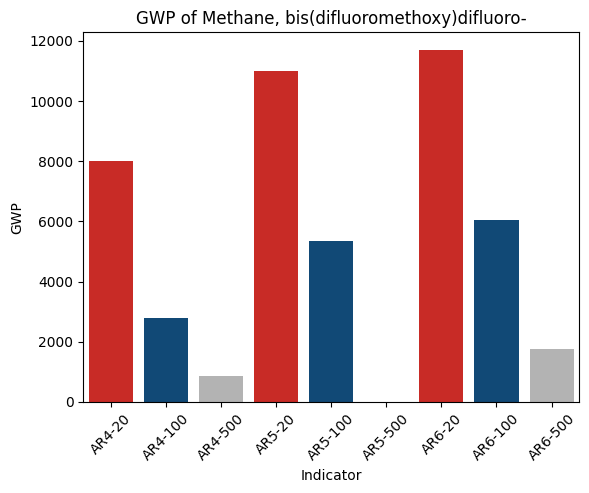

In [ ]:
gwp_data = []
gas = 'Methane, bis(difluoromethoxy)difluoro-' # 二氟甲基醚
for ind in time_ind:
  target = df[(df['Indicator'] == ind) & (df['GHG'] == gas)]
  if not target.empty:
    gwp_data.append({'Indicator': ind, 'GWP': target['GWP'].values[0]})
  else:
    gwp_data.append({'Indicator':ind, 'GWP': 0})

# 建立 dataframe
gwp_df = pd.DataFrame(gwp_data)
# 經濟學人色板
economist_palette = ["#E3120B", "#004B87", "#B3B3B3"]
# 重新畫 barplot
sns.barplot(data=gwp_df, x='Indicator', y='GWP', palette=economist_palette)
plt.xticks(rotation=45)
plt.title('GWP of Methane, bis(difluoromethoxy)difluoro-')

/tmp/ipython-input-39-282287464.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gwp_df, x='Indicator', y='GWP', palette=economist_palette)
/tmp/ipython-input-39-282287464.py:15: UserWarning: 
The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=gwp_df, x='Indicator', y='GWP', palette=economist_palette)


Text(0.5, 1.0, 'GWP of HG-02')

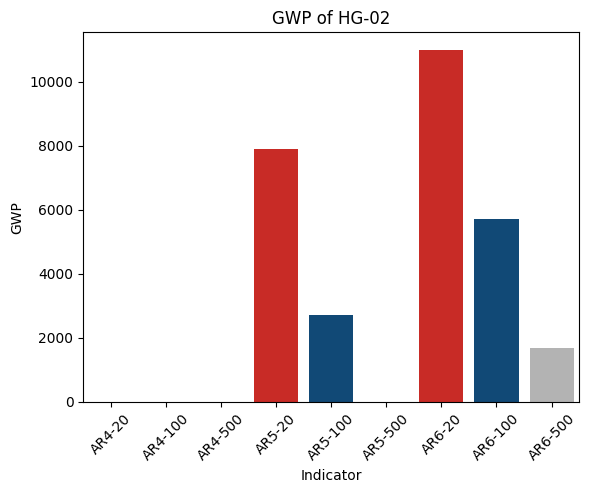

In [ ]:
gwp_data = []
gas = 'HG-02' #可能代表汞蒸氣
for ind in time_ind:
  target = df[(df['Indicator'] == ind) & (df['GHG'] == gas)]
  if not target.empty:
    gwp_data.append({'Indicator': ind, 'GWP': target['GWP'].values[0]})
  else:
    gwp_data.append({'Indicator':ind, 'GWP': 0})

# 建立 dataframe
gwp_df = pd.DataFrame(gwp_data)
# 經濟學人色板
economist_palette = ["#E3120B", "#004B87", "#B3B3B3"]
# 重新畫 barplot
sns.barplot(data=gwp_df, x='Indicator', y='GWP', palette=economist_palette)
plt.xticks(rotation=45)
plt.title('GWP of HG-02')

## 用 Seaborn 畫出並列長條圖

/tmp/ipython-input-47-437240971.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_100_df, x='GWP', y='GHG', ax=axes[0], palette = "Blues_r")
/tmp/ipython-input-47-437240971.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_500_df, x='GWP', y='GHG', ax=axes[1], palette = "Greens_r")


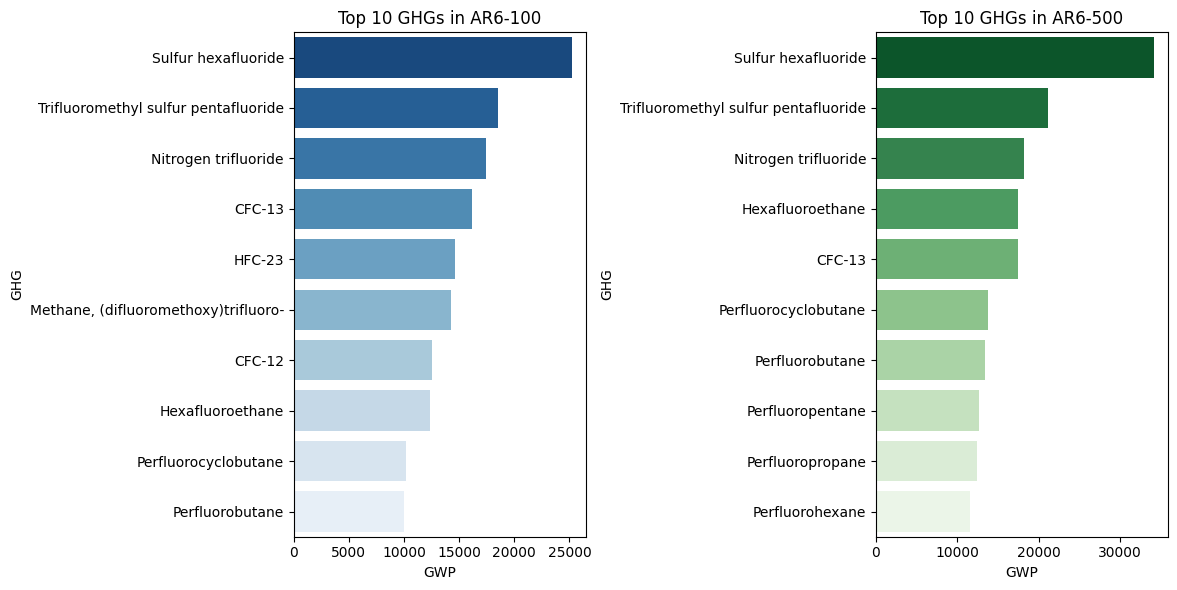

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
top10_100_df = pd.DataFrame(top10_100)
top10_500_df = pd.DataFrame(top10_500)
# AR6-100 Top 10
sns.barplot(data=top10_100_df, x='GWP', y='GHG', ax=axes[0], palette = "Blues_r")
axes[0].set_title('Top 10 GHGs in AR6-100') # Add titles to subplots
# AR6-500 Top 10
sns.barplot(data=top10_500_df, x='GWP', y='GHG', ax=axes[1], palette = "Greens_r")
axes[1].set_title('Top 10 GHGs in AR6-500') # Add titles to subplots

# 解決畫面太寬問題
plt.tight_layout()
plt.show() # Add plt.show() to display the plot

/tmp/ipython-input-48-3568925924.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_100_pd, x='GWP', y='GHG', ax=axes[0], palette="Blues_r")
/tmp/ipython-input-48-3568925924.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_500_pd, x='GWP', y='GHG', ax=axes[1], palette="Greens_r")


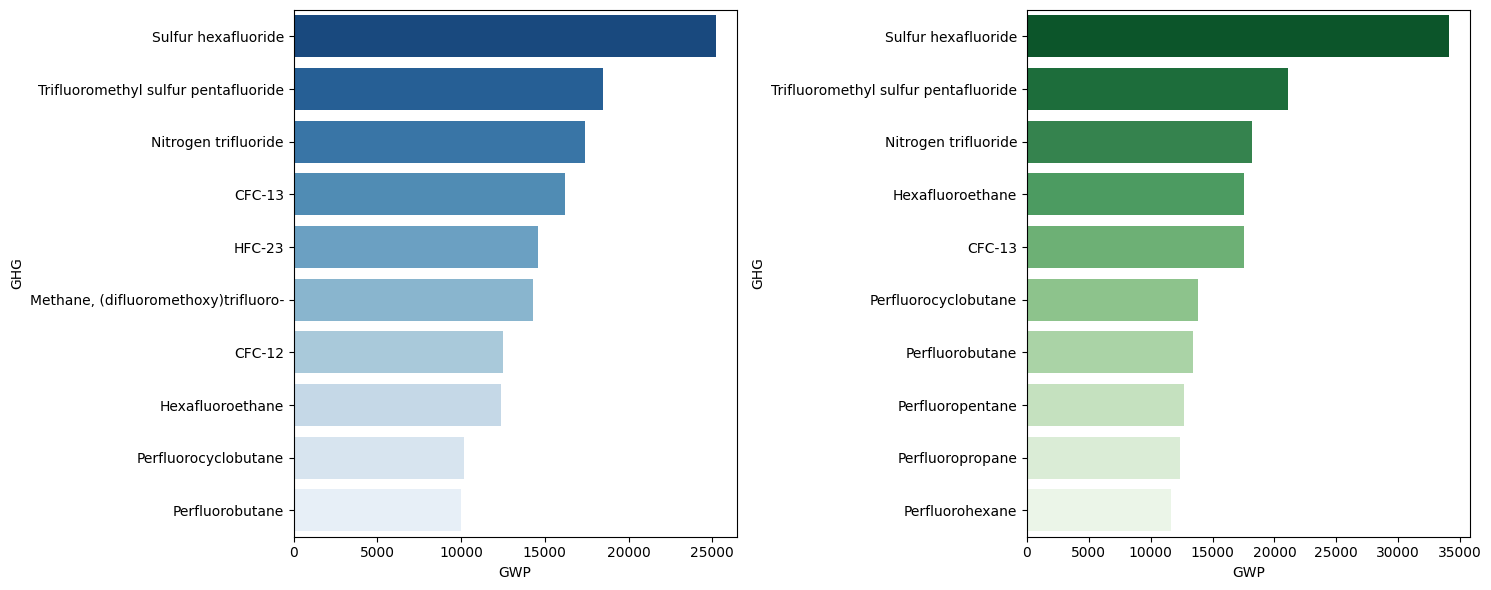

In [ ]:
# adjusted plot from the last cell
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
top10_100_pd = pd.DataFrame(top10_100)
top10_500_pd = pd.DataFrame(top10_500)
# AR6-100 Top 10
sns.barplot(data=top10_100_pd, x='GWP', y='GHG', ax=axes[0], palette="Blues_r")
# AR6-500 Top 10
sns.barplot(data=top10_500_pd, x='GWP', y='GHG', ax=axes[1], palette="Greens_r")

# 解決畫面太寬問題
plt.tight_layout()

# 找出 AR6-20, AR6-100, AR6-500 的共通氣體

In [ ]:
# set(top10_100["HGH"]) 100 的前10名
# common_gases = set(top10_100['GHG']).intersection(set(top10_500['GHG']))
set_20 = set(top10_20['GHG'])
set_100 = set(top10_100['GHG'])
set_500 = set(top10_500['GHG'])
#common_gases = set_20.intersection(set_100).intersection(set_500)
common_gases = set_20 & set_100 & set_500
print(common_gases)

{'Trifluoromethyl sulfur pentafluoride', 'Nitrogen trifluoride', 'CFC-13', 'Sulfur hexafluoride'}


查出有出現在AR6-20 但不在 AR6-100 和 AR6500 的氣體

In [ ]:
# 找出有在AR6-20 但不在 AR6-100 和 AR6500 的氣體
set_20_only = set_20 - set_100 - set_500
print(set_20_only)
#
top10_20[top10_20['GHG'].isin(set_100|set_500)]["GHG"]

{'Methane, bis(difluoromethoxy)difluoro-', 'HG-02', 'Methane, oxybis[difluoro-'}


,GHG
992,Sulfur hexafluoride
999,Trifluoromethyl sulfur pentafluoride
953,"Methane, (difluoromethoxy)trifluoro-"
960,Nitrogen trifluoride
851,CFC-12
852,CFC-13
906,HFC-23


In [ ]:
#
import matplotlib.pyplot as plt
data1 = df[df["GHG"] == "Methane, oxybis[difluoro-"]
# 建立報告 - 週期的清單
time_ind = ['AR4-20', 'AR4-100', 'AR4-500',
       'AR5-20', 'AR5-100', 'AR5-500',
       'AR6-20', 'AR6-100', 'AR6-500']

for ind in time_ind:
  target = data1[data1['Indicator'].str.contains(ind)]
  if not target.empty:
    gwp.append(target['GWP'].values[0])
    label.append(ind)
print(gwp)
print(label)

[np.float64(12200.0), np.float64(6320.0), np.float64(1960.0), np.float64(11600.0), np.float64(5560.0), np.float64(12700.0), np.float64(6630.0), np.float64(1940.0), np.float64(12200.0), np.float64(6320.0), np.float64(1960.0), np.float64(11600.0), np.float64(5560.0), np.float64(12700.0), np.float64(6630.0), np.float64(1940.0), np.float64(12200.0), np.float64(6320.0), np.float64(1960.0), np.float64(11600.0), np.float64(5560.0), np.float64(12700.0), np.float64(6630.0), np.float64(1940.0), np.float64(12200.0), np.float64(6320.0), np.float64(1960.0), np.float64(11600.0), np.float64(5560.0), np.float64(12700.0), np.float64(6630.0), np.float64(1940.0)]
['AR4-20', 'AR4-100', 'AR4-500', 'AR5-20', 'AR5-100', 'AR6-20', 'AR6-100', 'AR6-500', 'AR4-20', 'AR4-100', 'AR4-500', 'AR5-20', 'AR5-100', 'AR6-20', 'AR6-100', 'AR6-500', 'AR4-20', 'AR4-100', 'AR4-500', 'AR5-20', 'AR5-100', 'AR6-20', 'AR6-100', 'AR6-500', 'AR4-20', 'AR4-100', 'AR4-500', 'AR5-20', 'AR5-100', 'AR6-20', 'AR6-100', 'AR6-500']


## 不同週期的排名


In [ ]:
# 篩選AR6 20 的前10名氣體：
df_ar6_20 = df[df["Indicator"] == "AR6-20"]
top10_20 = df_ar6_20.sort_values(by = "GWP", ascending = False).head(10)
print(top10_20)

# 篩選AR6 100 的前10名氣體：
df_ar6_100 = df[df["Indicator"] == "AR6-100"]
top10_100 = df_ar6_100.sort_values(by = "GWP", ascending = False).head(10)
print(top10_100)

# 篩選AR6 500 的前10名氣體：
df_ar6_500 = df[df["Indicator"] == "AR6-500"]
top10_500 = df_ar6_500.sort_values(by = "GWP", ascending = False).head(10)
print(top10_500)

# 篩選AR5 20 的前10名氣體：
df_ar5_20 = df[df["Indicator"] == "AR5-20"]
ar5_top10_20 = df_ar5_20.sort_values(by = "GWP", ascending = False).head(10)
print(ar5_top10_20)

# 篩選AR5 100 的前10名氣體：
df_ar5_100 = df[df["Indicator"] == "AR5-100"]
ar5_top10_100 = df_ar5_100.sort_values(by = "GWP", ascending = False).head(10)
print(ar5_top10_100)

# 篩選AR4 20 的前10名氣體：
df_ar4_20 = df[df["Indicator"] == "AR4-20"]
ar4_top10_20 = df_ar4_20.sort_values(by = "GWP", ascending = False).head(10)
print(ar4_top10_20)

# 篩選AR4 100 的前10名氣體：
df_ar4_100 = df[df["Indicator"] == "AR4-100"]
ar4_top10_100 = df_ar4_100.sort_values(by = "GWP", ascending = False).head(10)
print(ar4_top10_100)

# 篩選AR4 500 的前10名氣體：
df_ar4_500 = df[df["Indicator"] == "AR4-500"]
ar4_top10_500 = df_ar4_500.sort_values(by = "GWP", ascending = False).head(10)
print(ar4_top10_500)


    Indicator                                     GHG      GWP Report  \
992    AR6-20                     Sulfur hexafluoride  18300.0    AR6   
999    AR6-20    Trifluoromethyl sulfur pentafluoride  13900.0    AR6   
953    AR6-20    Methane, (difluoromethoxy)trifluoro-  13500.0    AR6   
960    AR6-20                    Nitrogen trifluoride  13400.0    AR6   
851    AR6-20                                  CFC-12  12700.0    AR6   
955    AR6-20               Methane, oxybis[difluoro-  12700.0    AR6   
852    AR6-20                                  CFC-13  12400.0    AR6   
906    AR6-20                                  HFC-23  12400.0    AR6   
954    AR6-20  Methane, bis(difluoromethoxy)difluoro-  11700.0    AR6   
941    AR6-20                                   HG-02  11000.0    AR6   

    Time Horizon  
992           20  
999           20  
953           20  
960           20  
851           20  
955           20  
852           20  
906           20  
954           20  
941   